## Read in
## Analyse the data (visulize)
## Cleaning data
## Choose Model

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [87]:
raw_train_df = pd.read_csv('train.csv')
raw_test_df = pd.read_csv('test.csv')

In [63]:
raw_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
raw_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
raw_train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McMahon, Mr. Martin",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [68]:
raw_test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Ilieff, Mr. Ylio",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [69]:
raw_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
raw_test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Some Predictions:
## Sex: Females are more likely to survive.
## SibSp/Parch: People traveling alone are more likely to survive.
## Age: Young children are more likely to survive.
## Pclass: People of higher socioeconomic class are more likely to survive.

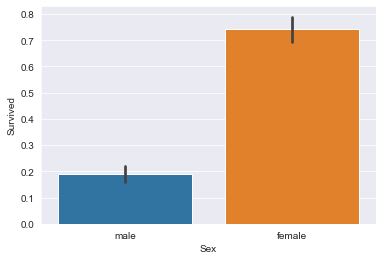

In [71]:
sns.barplot('Sex', 'Survived', data=raw_train_df)

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


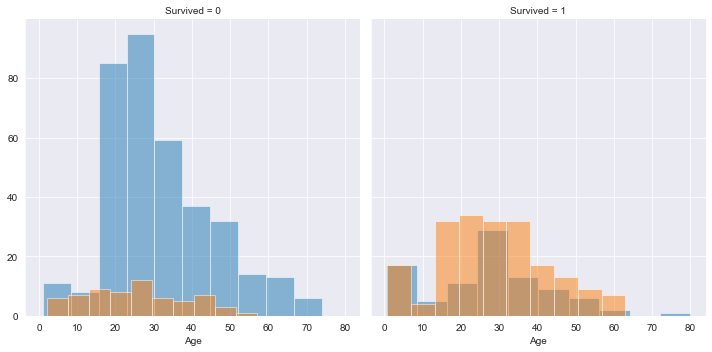

In [72]:
g = sns.FacetGrid(raw_train_df, col='Survived', size=5, hue='Sex')
g.map(plt.hist, 'Age', alpha=0.5)

In [73]:
raw_train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


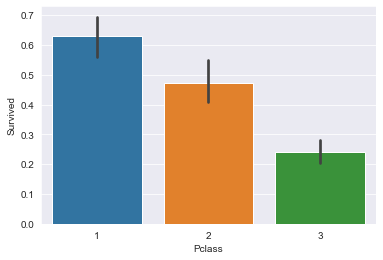

In [74]:
sns.barplot('Pclass', 'Survived', data=raw_train_df)

In [75]:
raw_train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


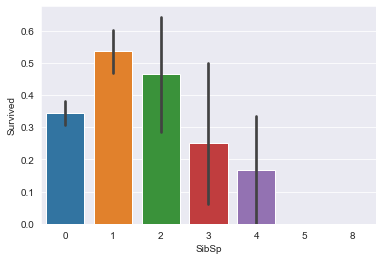

In [76]:
sns.barplot('SibSp', 'Survived', data=raw_train_df)

In [77]:
raw_train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


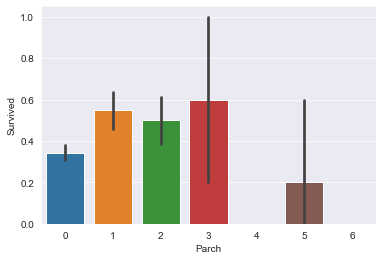

In [78]:
sns.barplot('Parch', 'Survived', data=raw_train_df)

In [79]:
raw_train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [268]:
age_train_df = raw_train_df.copy()
age_test_df = raw_test_df.copy()
age_combine = [age_train_df, age_test_df]

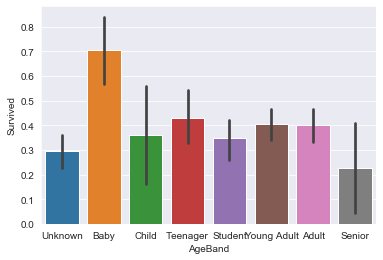

In [269]:
for dataset in age_combine:
    dataset['Age'] = dataset['Age'].fillna(-0.5)
    bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
    labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    
    dataset['AgeBand'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
    
sns.barplot(x='AgeBand', y='Survived', data=age_train_df)

In [270]:
age_train_df['CabinBool'] = age_train_df['Cabin'].notna().astype(int)
age_train_df[['CabinBool', 'Survived']].groupby('CabinBool', as_index=False).mean().sort_values(by='Survived', ascending=False)

,CabinBool,Survived
1,1,0.666667
0,0,0.299854


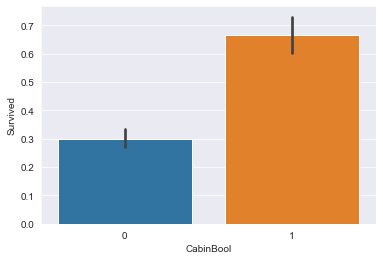

In [271]:
sns.barplot('CabinBool', 'Survived', data=age_train_df)

## cleaning

In [321]:
train_df = raw_train_df.copy()
test_df = raw_test_df.copy()
combine = [train_df, test_df]

In [322]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [323]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [324]:
for dataset in combine:
    dataset['CabinBool'] = dataset['Cabin'].notna().astype(int)

In [325]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [326]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [327]:
test_df.loc[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S'), 'Fare'].mean()

13.91302978723404

In [328]:
test_df.loc[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S'), 'Fare'].median()

8.05

In [329]:
age_test_df[(age_test_df['AgeBand'] == 'Senior')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
13,905,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S,Senior
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,Senior
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Senior
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S,Senior
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,Senior
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Senior
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,Senior
193,1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q,Senior
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,D37,C,Senior


In [330]:
test_df['Fare'].fillna(test_df.loc[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S'), 'Fare'].mean(), inplace=True)

In [331]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [332]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [333]:
for dataset in combine:
    dataset['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Dona'], 'Rare', inplace=True)
    dataset['Title'].replace(['Jonkheer', 'Countess', 'Lady', 'Sir'], 'Royal', inplace=True)
    dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)

In [334]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
5,Royal,0.750000
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.263158
2,Mr,0.156673


In [335]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [336]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Royal':4, 'Rare':5})

In [337]:
mr_age = train_df.loc[(train_df['Title'] == 0) & (train_df['Age'] > 0), 'Age'].median()
miss_age = train_df.loc[(train_df['Title'] == 1) & (train_df['Age'] > 0), 'Age'].median()
mrs_age = train_df.loc[(train_df['Title'] == 2) & (train_df['Age'] > 0), 'Age'].median()
master_age = train_df.loc[(train_df['Title'] == 3) & (train_df['Age'] > 0), 'Age'].median()
royal_age = train_df.loc[(train_df['Title'] == 4) & (train_df['Age'] > 0), 'Age'].median()
rare_age = train_df.loc[(train_df['Title'] == 5) & (train_df['Age'] > 0), 'Age'].median()

unknown_median_ages = (mr_age, miss_age, mrs_age, master_age, royal_age, rare_age)

for dataset in combine:
    for i in dataset['Title']:
        dataset.loc[(dataset['Age'].isna()) & (dataset['Title'] == i), 'Age'] = unknown_median_ages[i]

In [338]:
(mr_age, miss_age, mrs_age, master_age, royal_age, rare_age)

(30.0, 21.0, 35.0, 3.5, 43.0, 49.5)

In [339]:
master_age

3.5

In [340]:
# age_mapping = {'Baby': 0, 'Child': 1, 'Teenager': 2, 'Student': 3, 'Young Adult': 4, 'Adult': 5, 'Senior': 6}

for dataset in combine:
    bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
    labels = [0, 1, 2, 3, 4, 5, 6]
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

In [341]:
for dataset in combine:
    labels = [0, 1, 2, 3]
    dataset['FareBand'] = pd.qcut(dataset['Fare'], 4, labels=labels)

In [342]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup,FareBand
0,0,3,male,22.0,1,0,7.2500,S,0,0,3,0
1,1,1,female,38.0,1,0,71.2833,C,1,2,5,3
2,1,3,female,26.0,0,0,7.9250,S,0,1,4,1
3,1,1,female,35.0,1,0,53.1000,S,1,2,4,3
4,0,3,male,35.0,0,0,8.0500,S,0,0,4,1


In [343]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup,FareBand
0,892,3,male,34.5,0,0,7.8292,Q,0,0,4,0
1,893,3,female,47.0,1,0,7.0000,S,0,2,5,0
2,894,2,male,62.0,0,0,9.6875,Q,0,0,6,1
3,895,3,male,27.0,0,0,8.6625,S,0,0,4,1
4,896,3,female,22.0,1,1,12.2875,S,0,2,3,1


In [344]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female':1})
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})
    dataset.drop(['Age', 'Fare'], axis=1, inplace=True)

In [346]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,0,3,0,1,0,0,0,0,3,0
1,1,1,1,1,0,1,1,2,5,3
2,1,3,1,0,0,0,0,1,4,1
3,1,1,1,1,0,0,1,2,4,3
4,0,3,0,0,0,0,0,0,4,1


In [347]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareBand
0,892,3,0,0,0,2,0,0,4,0
1,893,3,1,1,0,0,0,2,5,0
2,894,2,0,0,0,2,0,0,6,1
3,895,3,0,0,0,0,0,0,4,1
4,896,3,1,1,1,0,0,2,3,1


## modeling

In [366]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.22, random_state=42)

In [367]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((694, 9), (197, 9), (694,), (197,))

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#from sklearn.metrics import accuracy_score

In [390]:
log = LogisticRegression()

log.fit(X_train, y_train)
y_pred = log.predict(X_val)
acc_log = log.score(X_val, y_val)
print('train score',log.score(X_train, y_train))
print('val score', acc_log)

train score 0.8170028818443804
val score 0.8121827411167513


/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [391]:
coeff_df = pd.DataFrame(index = train_df.columns.delete(0), columns = ['Coefficient'])
coeff_df['Coefficient'] = log.coef_.transpose()
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Sex,2.220630
CabinBool,0.739756
Title,0.413316
FareBand,0.267454
Embarked,0.230100
Parch,-0.275803
AgeGroup,-0.320280
SibSp,-0.491212
Pclass,-0.502167


In [406]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = knn.score(X_val, y_val)
print('train score',knn.score(X_train, y_train))
print('val score', acc_knn)

train score 0.8688760806916427
val score 0.8223350253807107


In [424]:
svc = SVC(gamma='auto')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
acc_svc = svc.score(X_val, y_val)
print('train score',svc.score(X_train, y_train))
print('val score', acc_svc)

train score 0.8414985590778098
val score 0.8274111675126904


In [408]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_val)
acc_linear_svc = linear_svc.score(X_val, y_val)
print('train score',linear_svc.score(X_train, y_train))
print('val score', acc_linear_svc)

train score 0.8141210374639769
val score 0.7918781725888325


/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [410]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_val)
acc_nb = nb.score(X_val, y_val)
print('train score',nb.score(X_train, y_train))
print('val score', acc_nb)

train score 0.792507204610951
val score 0.7868020304568528


In [411]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
acc_tree = tree.score(X_val, y_val)
print('train score',tree.score(X_train, y_train))
print('val score', acc_tree)

train score 0.9121037463976945
val score 0.7766497461928934


In [412]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)
acc_forest = forest.score(X_val, y_val)
print('train score', forest.score(X_train, y_train))
print('val score', acc_forest)

train score 0.9077809798270894
val score 0.817258883248731


/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [413]:
per = Perceptron()

per.fit(X_train, y_train)
y_pred = per.predict(X_val)
acc_per = per.score(X_val, y_val)
print('train score', per.score(X_train, y_train))
print('val score', acc_per)

train score 0.723342939481268
val score 0.7258883248730964


In [415]:
sgd = SGDClassifier()

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)
acc_sgd = sgd.score(X_val, y_val)
print('train score', sgd.score(X_train, y_train))
print('val score', acc_sgd)

train score 0.7118155619596542
val score 0.7208121827411168


In [419]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_val)
acc_gbk = gbk.score(X_val, y_val)
print('train score', gbk.score(X_train, y_train))
print('val score', acc_gbk)

train score 0.8746397694524496
val score 0.8121827411167513


In [425]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_forest, acc_nb, acc_per ,acc_linear_svc, acc_tree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.827411
1,KNN,0.822335
3,Random Forest,0.817259
2,Logistic Regression,0.812183
9,Gradient Boosting Classifier,0.812183
6,Linear SVC,0.791878
4,Naive Bayes,0.786802
7,Decision Tree,0.776650
5,Perceptron,0.725888
8,Stochastic Gradient Descent,0.720812


In [432]:
ids = test_df["PassengerId"]
predictions = svc.predict(test_df.drop('PassengerId', axis=1))

submission = pd.DataFrame({"PassengerId": ids, "Survived": predictions})
submission.to_csv("Nadin_Tamers_submission.csv", index=False)